## Working on Boston housing data


In [1]:
import pandas as pd
housing = pd.read_csv("Boston.csv")

In [2]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing['INDUS'].value_counts()

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 76, dtype: int64

In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


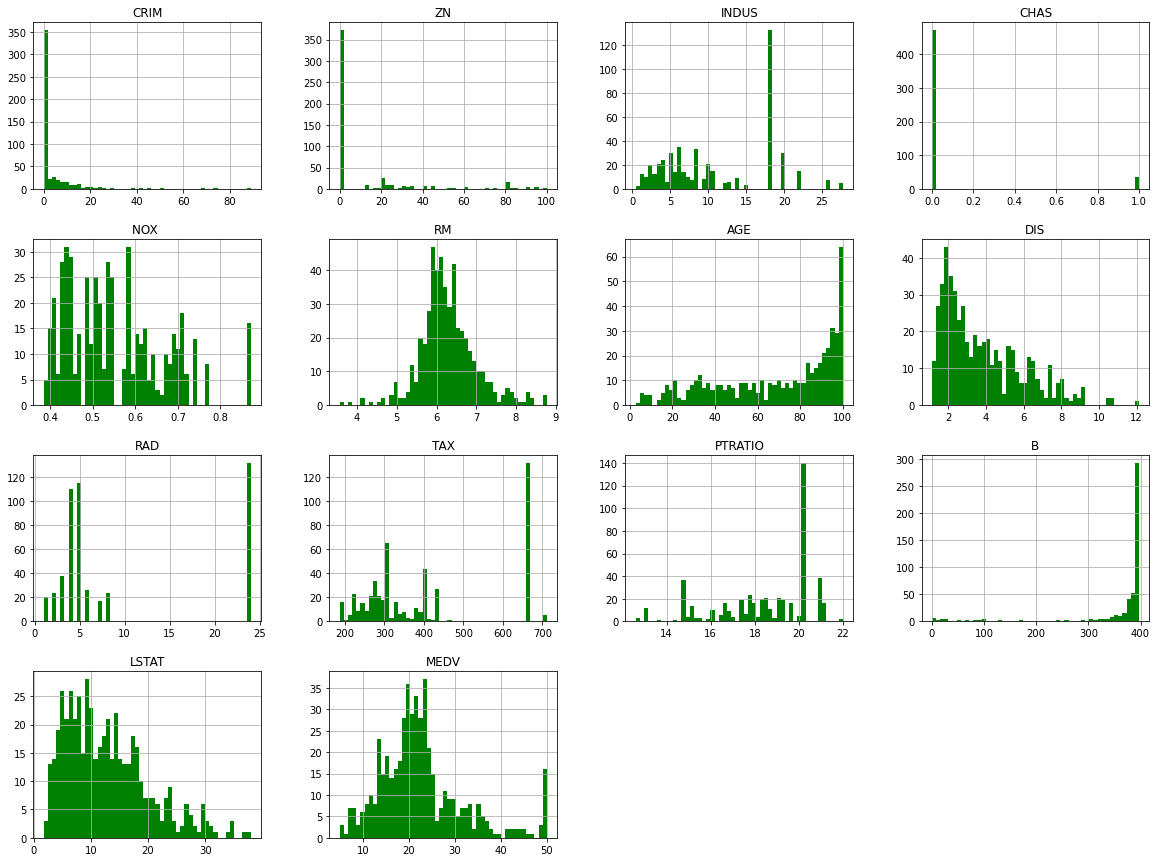

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15),color='g')
plt.show()

## Train-Test Spliting


In [8]:
#Make our own function to split the data randomly
import numpy as np
def splitFunction(data, ratio):
    np.random.seed(0)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = splitFunction(housing,0.2)
print(train_set)
print(f"Rows in train set = {len(train_set)}\nRows in test set = {len(test_set)}")

        CRIM    ZN  INDUS  CHAS   NOX      RM   AGE     DIS  RAD  TAX  \
108  0.12802   0.0   8.56     0  0.520  6.474  97.1  2.4329    5  384   
220  0.35809   0.0   6.20     1  0.507  6.951  88.5  2.8617    8  307   
71   0.15876   0.0  10.81     0  0.413  5.961  17.5  5.2873    4  305   
240  0.11329  30.0   4.93     0  0.428  6.897  54.3  6.3361    6  300   
6    0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
323  0.28392   0.0   7.38     0  0.493  5.708  74.3  4.7211    5  287   
192  0.08664  45.0   3.44     0  0.437  7.178  26.3  6.4798    5  398   
117  0.15098   0.0  10.01     0  0.547  6.021  82.6  2.7474    6  432   
47   0.22927   0.0   6.91     0  0.448  6.030  85.5  5.6894    3  233   
172  0.13914   0.0   4.05     0  0.510  5.572  88.5  2.5961    5  296   

     PTRATIO       B  LSTAT  MEDV  
108     20.9  395.24  12.27  19.8  
220     17.4  391.70   9.71  26.7  
71      19.2  3

In [9]:
#Now we using the function of sklearn to split the data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=0)
print(train_set)

         CRIM    ZN  INDUS  CHAS   NOX      RM   AGE     DIS  RAD  TAX  \
220   0.35809   0.0   6.20     1  0.507  6.951  88.5  2.8617    8  307   
71    0.15876   0.0  10.81     0  0.413  5.961  17.5  5.2873    4  305   
240   0.11329  30.0   4.93     0  0.428  6.897  54.3  6.3361    6  300   
6     0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
417  25.94060   0.0  18.10     0  0.679  5.304  89.1  1.6475   24  666   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
323   0.28392   0.0   7.38     0  0.493  5.708  74.3  4.7211    5  287   
192   0.08664  45.0   3.44     0  0.437  7.178  26.3  6.4798    5  398   
117   0.15098   0.0  10.01     0  0.547  6.021  82.6  2.7474    6  432   
47    0.22927   0.0   6.91     0  0.448  6.030  85.5  5.6894    3  233   
172   0.13914   0.0   4.05     0  0.510  5.572  88.5  2.5961    5  296   

     PTRATIO       B  LSTAT  MEDV  
220     17.4  391.70   9.71  26.7  
71      19.2  376.94   9.88  21.7  
240

In [10]:
#In our dataset there is one feature name CHAS which contain bool value, so there is posibility
#when we split our data all the zeros/ones come in either test or tarin dataset and other one has
#no instances of zeros/ones
#That's why we use stratified sampling on the basis of CHAS feature
from sklearn.model_selection import StratifiedShuffleSplit
x = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=0)
for train_index, test_index in x.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print(strat_test_set)

         CRIM    ZN  INDUS  CHAS   NOX      RM   AGE     DIS  RAD  TAX  \
283   0.01501  90.0   1.21     1  0.401  7.923  24.8  5.8850    1  198   
119   0.14476   0.0  10.01     0  0.547  5.731  65.2  2.7592    6  432   
39    0.02763  75.0   2.95     0  0.428  6.595  21.8  5.4011    3  252   
445  10.67180   0.0  18.10     0  0.740  6.459  94.8  1.9879   24  666   
458   7.75223   0.0  18.10     0  0.713  6.301  83.7  2.7831   24  666   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
394  13.35980   0.0  18.10     0  0.693  5.887  94.7  1.7821   24  666   
144   2.77974   0.0  19.58     0  0.871  4.903  97.8  1.3459    5  403   
490   0.20746   0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711   
284   0.00906  90.0   2.97     0  0.400  7.088  20.8  7.3073    1  285   
439   9.39063   0.0  18.10     0  0.740  5.627  93.9  1.8172   24  666   

     PTRATIO       B  LSTAT  MEDV  
283     13.6  395.52   3.16  50.0  
119     17.8  391.50  13.61  19.3  
39 

In [11]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 283 to 439
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [12]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.311914,14.573529,11.350980,0.068627,0.561628,6.245382,68.357843,3.634461,9.862745,422.343137,18.298039,343.499804,12.825000,23.230392
std,7.651088,28.582034,7.320231,0.254068,0.121648,0.747470,29.840010,2.061465,9.243718,177.753500,2.232699,109.712811,7.234955,9.578077
min,0.009060,0.000000,1.210000,0.000000,0.400000,3.561000,6.600000,1.169100,1.000000,188.000000,13.000000,2.520000,2.870000,5.000000
25%,0.073425,0.000000,3.990000,0.000000,0.448000,5.878000,42.325000,2.091325,4.000000,277.000000,17.000000,359.280000,6.530000,16.750000
50%,0.256355,0.000000,10.010000,0.000000,0.544000,6.204500,83.250000,2.852750,5.000000,371.000000,18.550000,391.775000,12.765000,21.950000
75%,3.831020,18.125000,18.100000,0.000000,0.643000,6.651500,93.875000,4.841950,24.000000,666.000000,20.200000,396.390000,16.500000,26.850000
max,67.920800,100.000000,27.740000,1.000000,0.871000,8.398000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,34.770000,50.000000


In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
# Now checking the ratio of the zeros over one in CHAS feature
95/7

13.571428571428571

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
# we can see that the ratio of zero over one is approximately same in both the train and test
# this is due to the StratifiedShuffleSplit
376/28

13.428571428571429

In [17]:
housing = strat_train_set.copy() # Now making housing our train set

## Looking for Correlations

In [18]:
# +1 is indicating strong positive correlations
# -1 is indicating strong negative correlations
# 0.69 is indicating high positive correlations and vice versa
# MEDV are pricespositions 
"""
Here we just want to check if we increase the value of MEDV than what is the effect on features
is they increasing or decreasing positive value indicates increasing and negative value indicates
the nature of descreasing.
"""
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.722678
B          0.326640
ZN         0.295445
DIS        0.229198
CHAS       0.163718
AGE       -0.347770
RAD       -0.393081
CRIM      -0.395603
NOX       -0.415604
INDUS     -0.458890
TAX       -0.481014
PTRATIO   -0.505297
LSTAT     -0.739293
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

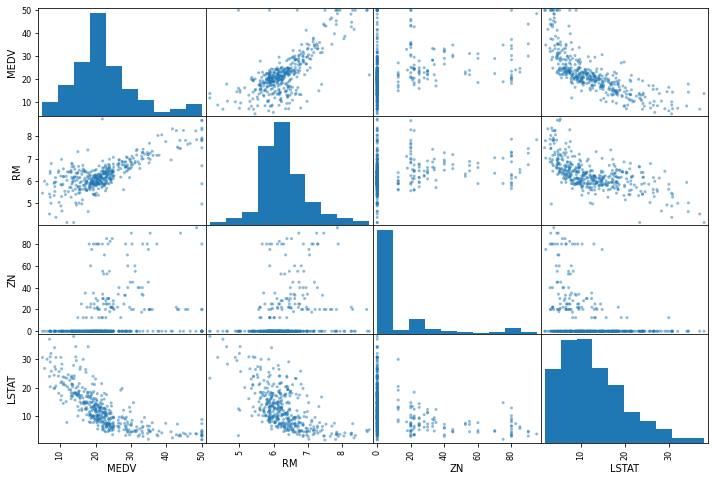

In [19]:
# using pandas function to plot graphs between high positive,high negative and feature target
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

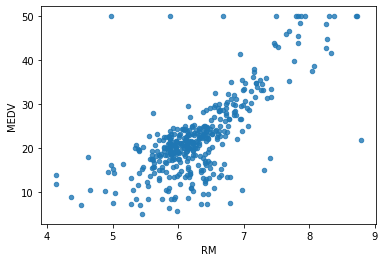

In [20]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out attribute Combinations


In [21]:
# we make another feature by diving tax and number of rooms features.
housing["TAXRM"] = housing["TAX"]/housing["RM"]
# This feature is tax per room
housing["TAXRM"].describe()

count    404.000000
mean      65.880998
std       30.336465
min       24.645639
25%       43.939451
50%       53.427179
75%       94.594556
max      160.947318
Name: TAXRM, dtype: float64

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0,30.405405
24,0.75026,0.0,8.14,0,0.5380,5.924,94.1,4.3996,4,307,21.0,394.33,16.30,15.6,51.823093
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
479,14.33370,0.0,18.10,0,0.6140,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4,106.919249
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6,44.627585


In [23]:
# Now agin finding Correlation matrix
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.722678
B          0.326640
ZN         0.295445
DIS        0.229198
CHAS       0.163718
AGE       -0.347770
RAD       -0.393081
CRIM      -0.395603
NOX       -0.415604
INDUS     -0.458890
TAX       -0.481014
PTRATIO   -0.505297
TAXRM     -0.564517
LSTAT     -0.739293
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

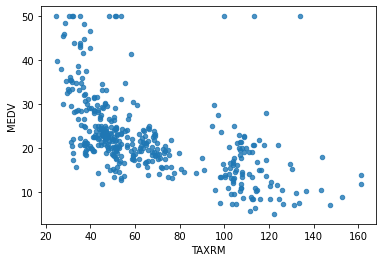

In [24]:
# We found another highly negative correlation TAXRM
# Now plotting TAXRM and MEDV
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [25]:
# Removing the cloumn of MEDV from data
# don't take the "TAXRM" feature
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [26]:
"""
How to take care of missing attributes, we have three options:
1) Get rid of the missing data points.
2) Get rid of the whole attribute.
3) Set the value to some value(0, mean,median)
"""


'\nHow to take care of missing attributes, we have three options:\n1) Get rid of the missing data points.\n2) Get rid of the whole attribute.\n3) Set the value to some value(0, mean,median)\n'

In [27]:
# 1) solution of option 1
a = housing.dropna(subset=["RM"])
a.shape
#There is no missing value in the RM feature so that the shape reamin same

(404, 13)

In [28]:
# 2) solution of option 2
a.drop("RM", axis=1)
# Here we can se that the there is no feature called RM in a data

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
64,0.01951,17.5,1.38,0,0.4161,59.5,9.2229,3,216,18.6,393.24,8.05
24,0.75026,0.0,8.14,0,0.5380,94.1,4.3996,4,307,21.0,394.33,16.30
379,17.86670,0.0,18.10,0,0.6710,100.0,1.3861,24,666,20.2,393.74,21.78
479,14.33370,0.0,18.10,0,0.6140,88.0,1.9512,24,666,20.2,383.32,13.11
325,0.19186,0.0,7.38,0,0.4930,14.7,5.4159,5,287,19.6,393.68,5.08
...,...,...,...,...,...,...,...,...,...,...,...,...
455,4.75237,0.0,18.10,0,0.7130,86.5,2.4358,24,666,20.2,50.92,18.13
59,0.10328,25.0,5.13,0,0.4530,47.2,6.9320,8,284,19.7,396.90,9.22
417,25.94060,0.0,18.10,0,0.6790,89.1,1.6475,24,666,20.2,127.36,26.64
140,0.29090,0.0,21.89,0,0.6240,93.6,1.6119,4,437,21.2,388.08,24.16


In [29]:
housing
# But here we can clearly see there is RM feature in Housing data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05
24,0.75026,0.0,8.14,0,0.5380,5.924,94.1,4.3996,4,307,21.0,394.33,16.30
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78
479,14.33370,0.0,18.10,0,0.6140,6.229,88.0,1.9512,24,666,20.2,383.32,13.11
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,4.75237,0.0,18.10,0,0.7130,6.525,86.5,2.4358,24,666,20.2,50.92,18.13
59,0.10328,25.0,5.13,0,0.4530,5.927,47.2,6.9320,8,284,19.7,396.90,9.22
417,25.94060,0.0,18.10,0,0.6790,5.304,89.1,1.6475,24,666,20.2,127.36,26.64
140,0.29090,0.0,21.89,0,0.6240,6.174,93.6,1.6119,4,437,21.2,388.08,24.16


In [30]:
# 3) solution of option 3
median = housing["RM"].median()
# This fillna function fill the value of median in blank spaces of RM attribute
housing["RM"].fillna(median)

64     7.104
24     5.924
379    6.223
479    6.229
325    6.431
       ...  
455    6.525
59     5.927
417    5.304
140    6.174
493    5.707
Name: RM, Length: 404, dtype: float64

In [31]:
# We can also fill the nan value by median in all the columns of housing data by imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
imputer.statistics_

array([2.58750e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.32000e-01,
       6.20850e+00, 7.66000e+01, 3.29860e+00, 5.00000e+00, 3.30000e+02,
       1.91000e+01, 3.91385e+02, 1.11700e+01])

In [32]:
# We saw that there is no change in data because we know that there is no nan value in our data
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,6.294545,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653
std,8.832484,21.762399,6.747763,0.254290,0.114465,0.691453,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083437,0.000000,5.190000,0.000000,0.453000,5.887250,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500
50%,0.258750,0.000000,8.560000,0.000000,0.532000,6.208500,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.616500,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit learn design
1) Estimators:- It estimates some parameters based on dataset eg: imputer.

2) Transformers:- Transform method takes input and returns output based on the learning from fit().                     It also has a convenience function called fit_transform(),which fits and then 
                  transforms.
                  
3) Predictors:- LinearRegression model is an exaple of the predictor. fit() and predict() are two                     common functions and also gives score() function which will evaluate the predictions.

## Feature Scaling

primarily two types of feature scaling methods:
1. Min-max scaling(normalization): This technique re-scales a feature or observation value with                                          distribution value between 0 and 1.
                                   (value-min)/(max-min)  values lies between 0 and 1
                                   Sklearn provides a class called MinMaxScalar for this
    
2. Standardization: It is a very effective technique which re-scales a feature value so that it has                       distribution with 0 mean value and variance equals to 1.
                    (value-mean)/standard deviation
                    Sklearn provides a class called StandardScalar for this

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Example: If an algorithm is not using feature scaling method then it can consider the value 3000 meter to be greater than 5 km but that’s actually not true and in this case, the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to same magnitudes and thus, tackle this issue.



## Creating a Pipeline

In [33]:
# now we do all the stuff like feature scaling(using Standardization) get rid of nan values in data
# (Using imputer) and many more stuff of data preprocessing by creating a pipeline.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    # add as many as you want in pipeline
    ("std_scaler", StandardScaler()),
])


In [34]:
housing_num_tr = my_pipeline.fit_transform(housing) # this will give numpy array
housing_num_tr

array([[-0.41604527,  0.31960611, -1.43969621, ...,  0.04879332,
         0.38760272, -0.64069431],
       [-0.33320832, -0.48553026, -0.43664053, ...,  1.1672332 ,
         0.40031299,  0.51854468],
       [ 1.60709109, -0.48553026,  1.04123441, ...,  0.79441991,
         0.39343312,  1.28856039],
       ...,
       [ 2.52233886, -0.48553026,  1.04123441, ...,  0.79441991,
        -2.71277105,  1.97145754],
       [-0.38528082, -0.48553026,  1.60359847, ...,  1.26043652,
         0.32743298,  1.62298328],
       [-0.39861069, -0.48553026, -0.20664995, ...,  0.32840329,
         0.43028125, -0.0842596 ]])

In [35]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model

In [36]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [38]:
some_data = housing.iloc[:5]

In [39]:
some_labels = housing_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([24.92663414, 16.10273205, 16.54564051, 21.25663   , 24.64632388])

In [43]:
list(some_labels)

[33.0, 15.6, 10.2, 21.4, 24.6]

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [45]:
rmse

4.539738223656703

## Using better evaluation technique - Cross validation

In [48]:
# cost function is lower is better
# cross validation requires utility and utility is greater is better.
# That's why we give neg_mean_squared_error to the cross_val_score function.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
#neg_mean_squared_error is give negative value so we have to firstly convert it positive than take sqrt.
#cv=10 for 10 rounds of cross validation. 
rmse_scores = np.sqrt(-scores)

In [49]:
rmse_scores

array([6.68594566, 5.16256085, 4.22512805, 4.10041521, 4.71690666,
       3.7584709 , 4.34457676, 4.39782271, 5.76967059, 4.29916682])

In [50]:
def print_rmse_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    
print_rmse_scores(rmse_scores)

Scores:  [6.68594566 5.16256085 4.22512805 4.10041521 4.71690666 3.7584709
 4.34457676 4.39782271 5.76967059 4.29916682]
Mean:  4.746066419569059
Standard deviation:  0.8444518281604119


## Saving the model

In [56]:
from joblib import dump, load
dump(model, "RealEstatemodel.joblib")

['RealEstatemodel.joblib']

## Testing the model

In [57]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [58]:
final_rmse

5.369935113406186

In [59]:
print(final_predictions,list(Y_test))

[43.98913887 19.98304576 30.1655992  11.9363059  16.73161919 20.76023265
 34.1709654  22.39049356 23.08796651 30.53958362 18.78793515 15.42317565
 42.47558038 15.35819068 30.18373012 22.29306617 21.84089337 15.01581343
 18.13508972 12.76110208 21.35709171 21.83635662  9.22532673 10.89172633
 13.7608562  23.14471231 22.40795395 25.6437712  29.62077131 14.60623688
 13.78813803 16.57534585 18.48172854 16.65791562  8.77589694 12.11283936
 16.87885632 15.4501505  27.30767033 23.929273   28.97746332 30.73024875
 14.09299714 19.9397132   9.51942299 19.53157188 17.66414537 16.47022684
 41.36986441 32.14925964 30.36715098 30.63325206 32.62196501 19.65920512
 24.43397813 20.39395219 24.35164264 27.19876464 10.88922586 17.02821194
 17.5983807  24.35541425 24.93686736 32.91522009 19.21569137  5.15433246
 33.60329458 11.34707223 20.24077881 19.1453058  24.96513574 20.78435931
 32.20732022 32.37730796  9.29643764 23.93022834 32.44412049 32.8843131
 26.68146208 13.6262985  25.65290006 23.10304281 27.

## How to load ML model

In [60]:
from joblib import dump,load
my_model = load("RealEstatemodel.joblib")